# Exploratory analysis of the small molecules for MMP9

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df1 = pd.read_csv('data/MMP9_sm_activity_proc3.csv')
df1 = df1[df1['ADV_affinity'] != 0.0]

sns.set(rc={"figure.dpi":150, 'savefig.dpi':150})
sns.set_style("white")

In [2]:
df1.columns

Index(['molecule_chembl_id', 'canonical_smiles', 'standard_value',
       'activity_class', 'MW', 'LogP', 'NumHDonors', 'NumHAcceptors', 'TPSA',
       'pIC50', 'ADV_affinity'],
      dtype='object')

### Bioactivity class frequencies

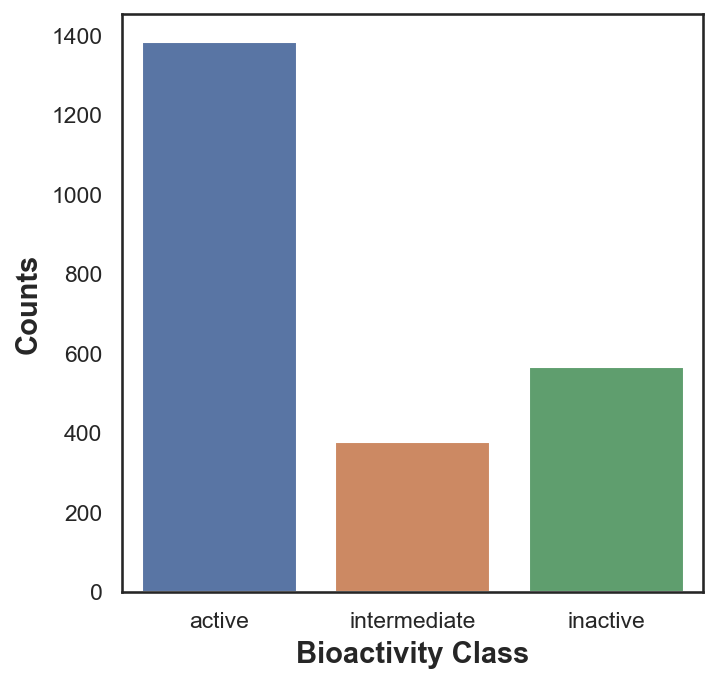

In [3]:
plt.figure(figsize=(5,5))

sns.countplot(x='activity_class', data=df1)
plt.xlabel('Bioactivity Class', fontsize=14, fontweight='bold')
plt.ylabel('Counts', fontsize=14, fontweight='bold')

plt.show()

Text(0, 0.5, 'pIC50 value')

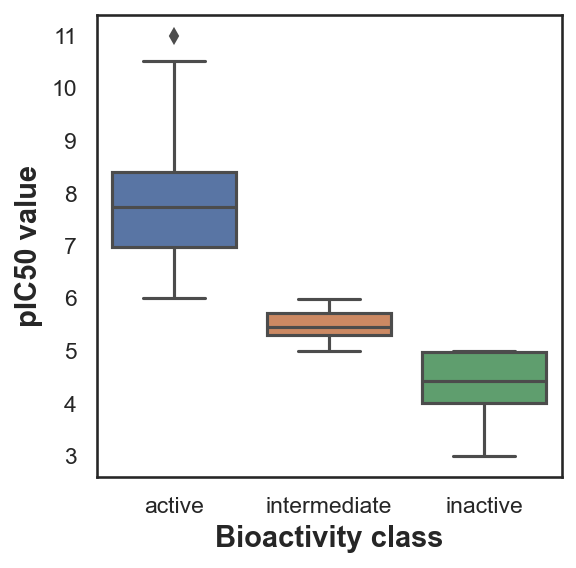

In [4]:
plt.figure(figsize=(4,4))

sns.boxplot(x ='activity_class', y = 'pIC50', data = df1)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

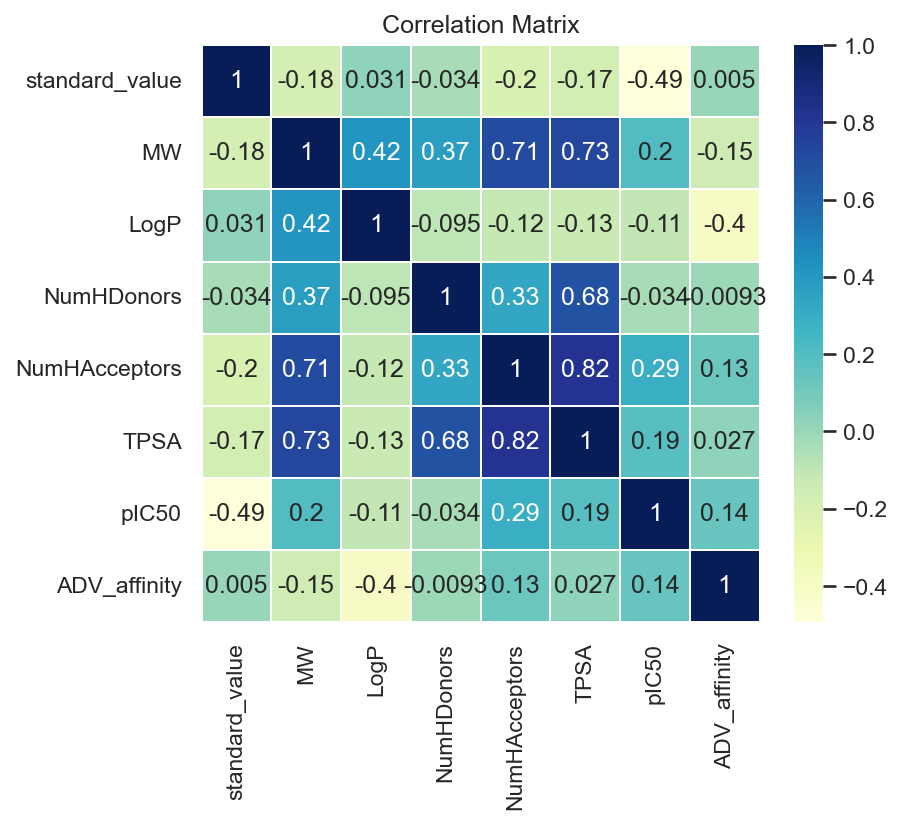

In [5]:
plt.figure(figsize=(6,5))

df1_subset1 = df1[['standard_value', 'MW', 'LogP', 'NumHDonors', 'NumHAcceptors', 'TPSA', 'pIC50', 'ADV_affinity']]


sns.heatmap(df1_subset1.corr(numeric_only=True), linewidth=.1, annot=True, cmap='YlGnBu')
plt.title('Correlation Matrix')
plt.show()

<Figure size 1050x750 with 0 Axes>

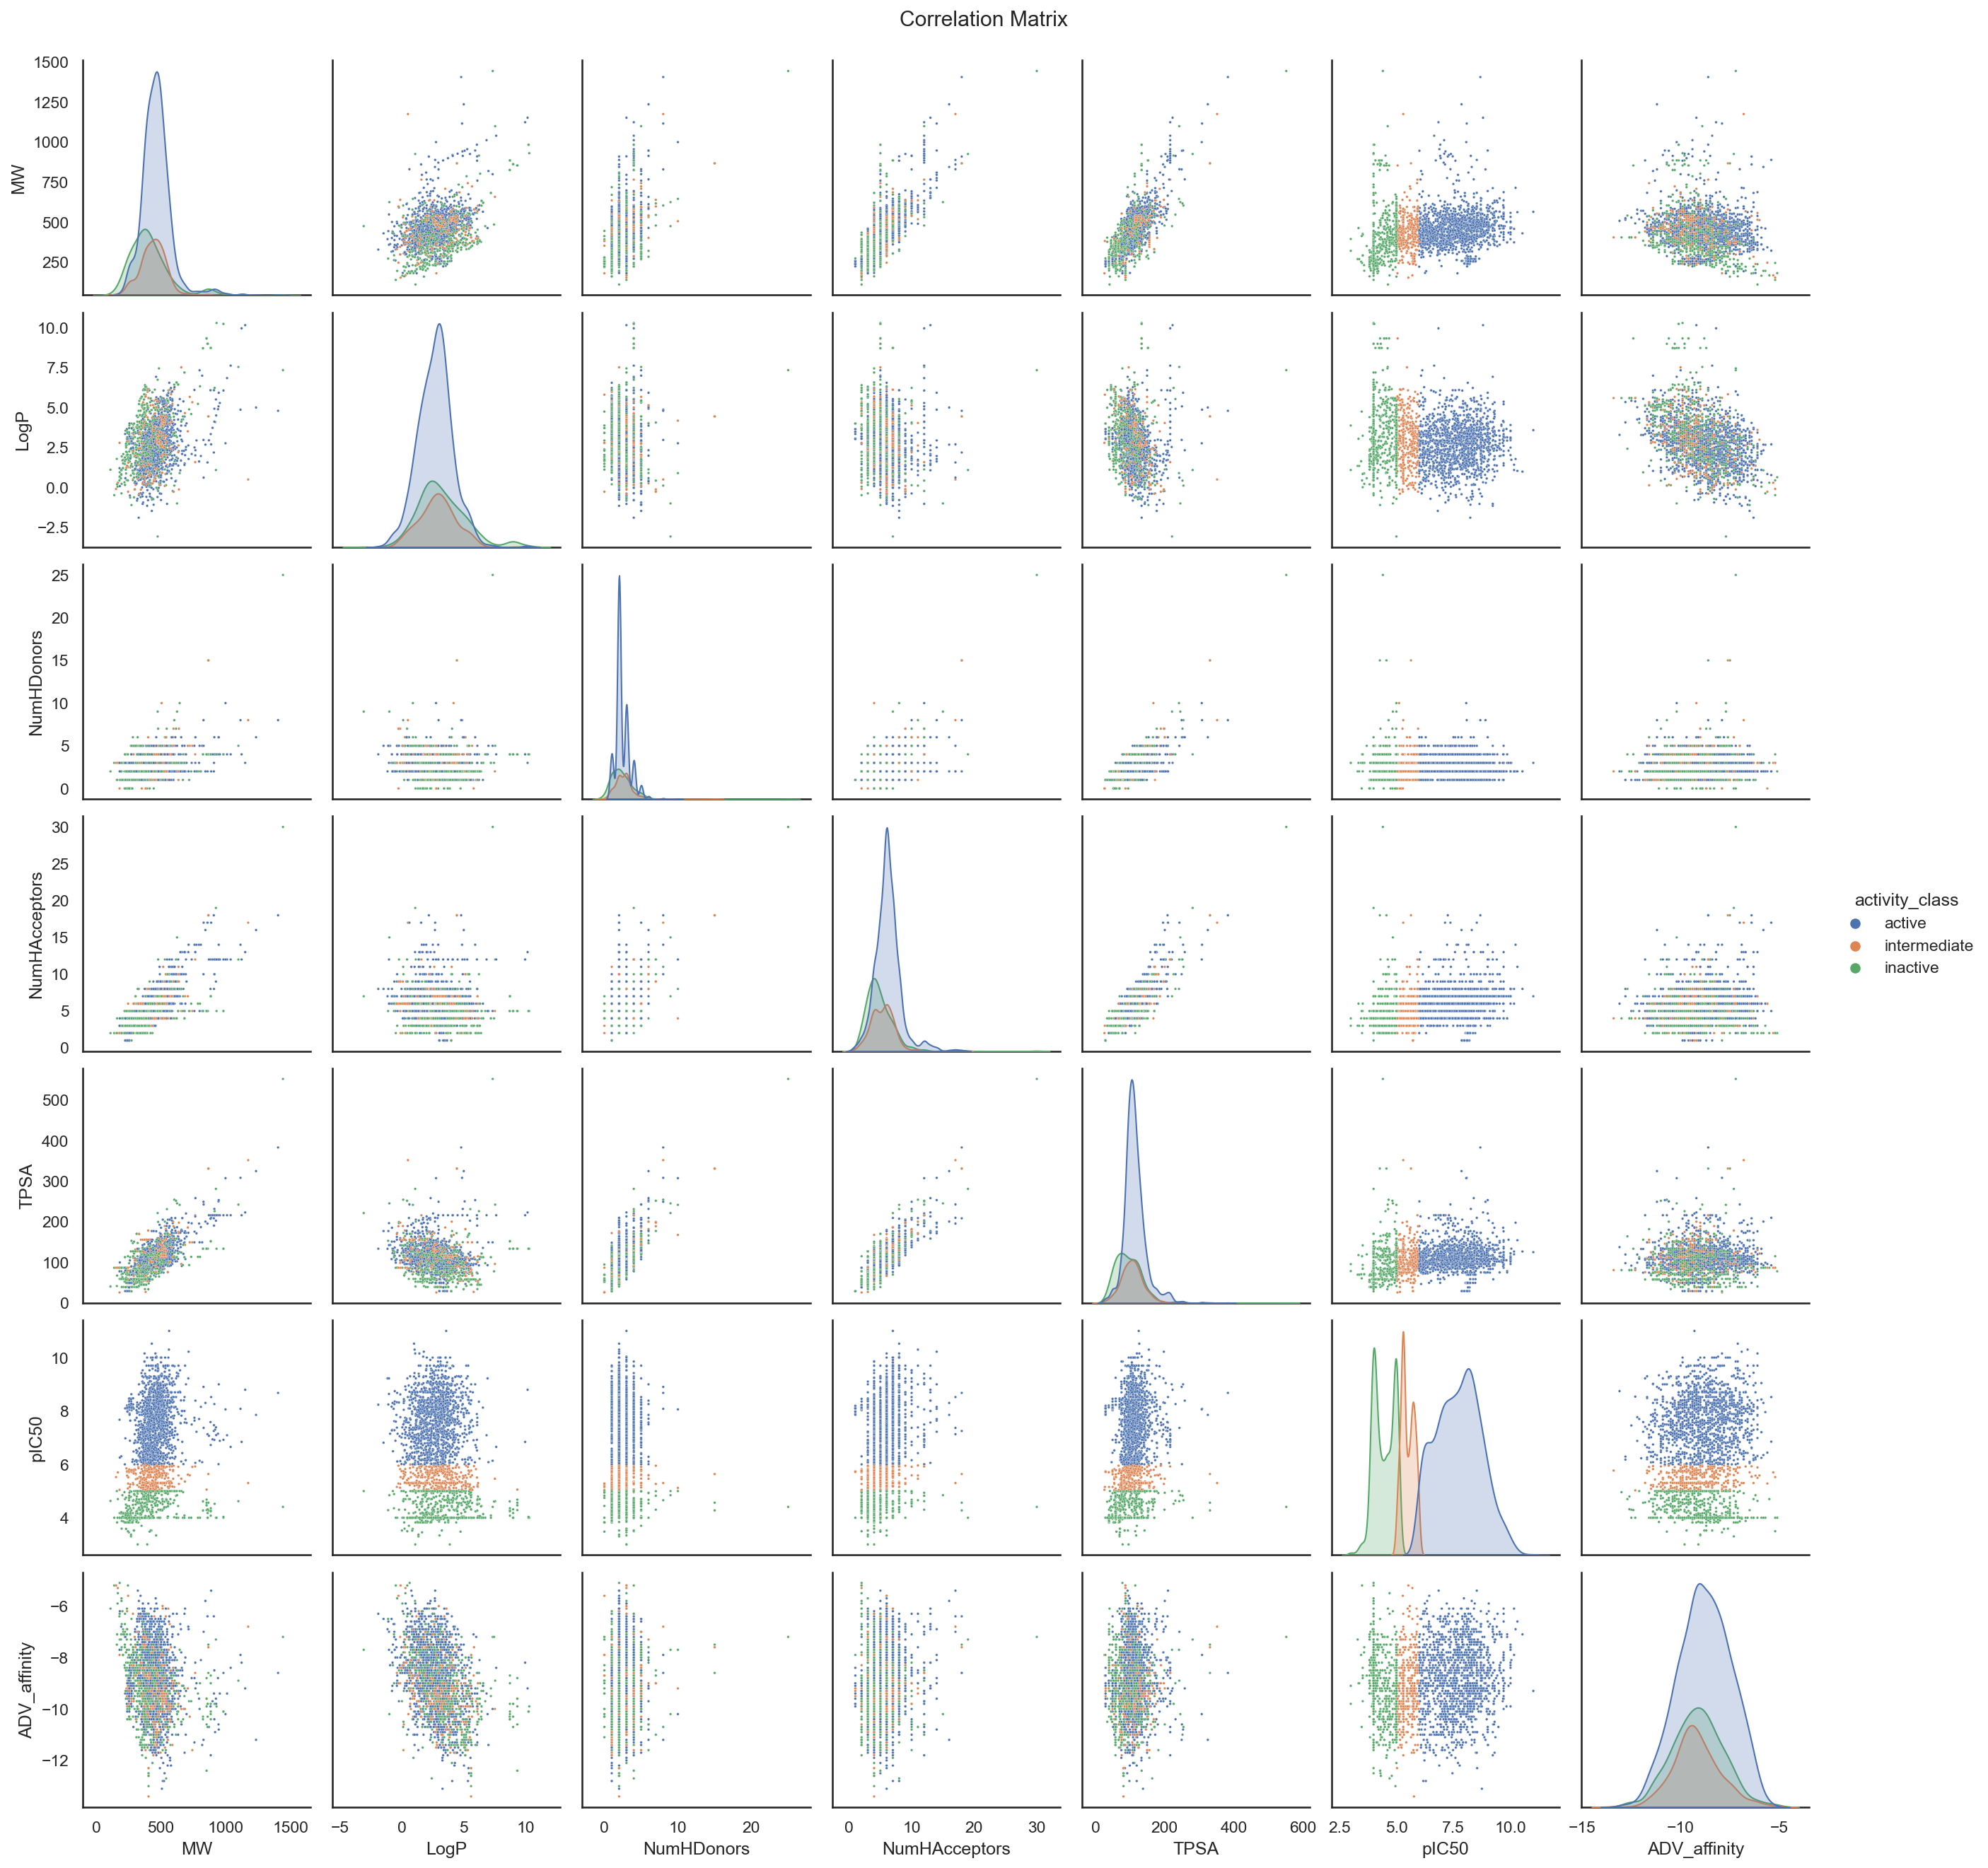

In [6]:
plt.figure(figsize=(7,5))

df1_subset1 = df1[['MW', 'LogP', 'NumHDonors', 'NumHAcceptors', 'TPSA', 'pIC50', 'activity_class', 'ADV_affinity']]

graph = sns.pairplot(df1_subset1, hue='activity_class', plot_kws={"s": 3})
graph.fig.suptitle('Correlation Matrix', y=1.01)
plt.show()

## Statistical analysis for each Lipinski parameter

In [7]:
# function that performs the Mann-Witney U-test
# https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/

def mannwhitney(descriptor, verbose=False): 
    from numpy.random import seed
    from numpy.random import randn
    from scipy.stats import mannwhitneyu

    # seed the random number generator
    seed(1)

    # actives and inactives
    selection = [descriptor, 'activity_class']
    df = df1[selection]
    active = df[df['activity_class'] == 'active']
    active = active[descriptor]

    selection = [descriptor, 'activity_class']
    df = df1[selection]
    inactive = df[df['activity_class'] == 'inactive']
    inactive = inactive[descriptor]

    # compare samples
    stat, p = mannwhitneyu(active, inactive)
    #print('Statistics=%.3f, p=%.3f' % (stat, p))
    
    # interpret
    alpha = 0.05
    if p > alpha:
        interpretation = 'Same distribution (fail to reject H0)'
    else:
        interpretation = 'Different distribution (reject H0)'
    
    results = pd.DataFrame({'Parameter':descriptor,
                            'Statistics':stat,
                            'p':p,
                            'alpha':alpha,
                            'Interpretation':interpretation}, index=[0])
    filename = 'mannwhitneyu_' + descriptor + '.csv'
    results.to_csv(f'data/{filename}', index=False)

    return results

In [8]:
mannwhitney('pIC50')

,Parameter,Statistics,p,alpha,Interpretation
0,pIC50,781395.0,1.088041e-263,0.05,Different distribution (reject H0)


In [9]:
mannwhitney('MW')

,Parameter,Statistics,p,alpha,Interpretation
0,MW,520214.0,1.370677e-30,0.05,Different distribution (reject H0)


In [10]:
mannwhitney('LogP')

,Parameter,Statistics,p,alpha,Interpretation
0,LogP,336668.0,0.000002,0.05,Different distribution (reject H0)


In [11]:
mannwhitney('NumHDonors')

,Parameter,Statistics,p,alpha,Interpretation
0,NumHDonors,422688.5,0.002526,0.05,Different distribution (reject H0)


In [12]:
mannwhitney('NumHAcceptors')

,Parameter,Statistics,p,alpha,Interpretation
0,NumHAcceptors,552166.5,6.413646e-48,0.05,Different distribution (reject H0)


In [13]:
mannwhitney('TPSA')

,Parameter,Statistics,p,alpha,Interpretation
0,TPSA,510138.0,2.846139e-26,0.05,Different distribution (reject H0)


In [14]:
mannwhitney('ADV_affinity')

,Parameter,Statistics,p,alpha,Interpretation
0,ADV_affinity,451066.0,8.319059e-08,0.05,Different distribution (reject H0)
